<a href="https://colab.research.google.com/github/sajith-91/MACHINE-LEARNING-MODELS/blob/main/YES_BANK_STOCK_PRICE_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - 
## **YES BANK STOCK PRICE PREDICTION**


##### **Project Type**    - Regression-MACHINE LEARNING
##### **Contribution**    - Individual
##### **Team Member 1 -**SAJITH VARGHESE

# **Project Summary -**

THIS DATA CONTAINS YES BANK STOCK ,CLOSING PRICE,HIGH VALUE OF STOCK IN EACH MONTH,LOW VALUE OF STOCK IN EACH MONTH,OPENING PRICE OF EACH MONTH AND MONTH AND YEAR RECORDED FOR PRICE.

# **GitHub Link -**

# **Problem Statement**


**The main objective of this data analysis is that predicting the closing price of each month **

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [173]:
# Import Libraries
import pandas as pd
import numpy as np
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from google.colab import files


### Dataset Loading

In [174]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ALMA BETTER/module 4/linear regression/linear regression capstone project/data_YesBank_StockPrices.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [175]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [176]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [177]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [178]:
# Dataset Duplicate Value Count

len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [179]:
# Missing Values/Null Values Count

no null values are present in the dataset

In [180]:
# Visualizing the missing values

### What did you know about your dataset?

data set contains 185 rows and 5 columns.no null values are present in the dataset.

## ***2. Understanding Your Variables***

In [181]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [182]:
# Dataset Describe
df.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


### Variables Description 



in this data,date,open,high and low considered as independent variables.close considering as dependent variable.



### Check Unique Values for each variable.

In [183]:
# Check Unique Values for each variable.
df.Close.unique()

array([ 12.46,  13.42,  13.3 ,  12.99,  13.41,  13.71,  15.33,  16.12,
        20.08,  19.49,  18.03,  15.62,  16.16,  17.84,  18.46,  22.78,
        25.32,  26.97,  30.16,  28.63,  28.14,  30.31,  33.51,  35.98,
        37.93,  36.99,  41.36,  43.48,  46.18,  49.81,  50.54,  49.42,
        33.75,  34.06,  31.13,  22.85,  25.45,  26.83,  24.13,  13.58,
        12.26,  15.03,  12.24,  10.26,   9.98,  15.45,  25.12,  29.68,
        31.93,  33.45,  40.99,  47.31,  50.57,  53.41,  49.84,  47.32,
        50.97,  57.1 ,  57.57,  53.83,  58.99,  62.22,  70.3 ,  71.86,
        61.21,  62.54,  52.59,  51.29,  61.98,  61.02,  60.07,  62.38,
        62.13,  55.61,  54.5 ,  62.9 ,  54.49,  47.72,  65.99,  69.14,
        73.46,  70.07,  66.02,  67.83,  72.85,  65.97,  76.44,  82.29,
        88.48,  92.84, 104.41,  94.5 ,  85.71, 100.28,  97.49,  92.2 ,
        64.76,  48.65,  57.5 ,  73.76,  73.74,  74.02,  61.59,  60.95,
        82.7 ,  88.14, 113.89, 108.38, 108.21, 114.33, 111.7 , 136.83,
      

In [184]:
df.Open.unique()

array([ 13.  ,  12.58,  13.48,  13.2 ,  13.35,  13.49,  13.68,  15.5 ,
        16.2 ,  20.56,  19.8 ,  18.2 ,  16.  ,  15.9 ,  18.  ,  18.78,
        22.8 ,  25.4 ,  27.4 ,  30.2 ,  29.3 ,  27.  ,  30.66,  33.89,
        35.98,  37.5 ,  37.4 ,  41.8 ,  44.4 ,  46.4 ,  49.99,  50.88,
        48.9 ,  33.9 ,  34.3 ,  31.22,  22.85,  25.  ,  26.68,  24.6 ,
        14.79,  12.4 ,  15.28,  12.19,  10.  ,  10.04,  15.94,  25.6 ,
        29.7 ,  31.98,  33.8 ,  41.2 ,  46.58,  50.98,  53.6 ,  49.  ,
        47.8 ,  50.67,  56.94,  56.7 ,  53.55,  59.4 ,  62.8 ,  70.9 ,
        72.2 ,  61.8 ,  62.98,  53.  ,  51.84,  62.  ,  61.26,  60.4 ,
        63.  ,  62.9 ,  56.  ,  53.8 ,  62.2 ,  57.  ,  47.92,  65.9 ,
        69.  ,  73.62,  70.4 ,  65.45,  68.15,  73.  ,  66.2 ,  76.4 ,
        82.54,  89.2 ,  93.2 , 104.41,  94.  ,  85.7 , 100.99,  99.  ,
        92.4 ,  66.  ,  49.2 ,  58.  ,  74.  ,  74.4 ,  74.74,  61.54,
        60.52,  83.45,  88.8 , 114.8 , 108.43, 107.4 , 114.6 , 112.1 ,
      

In [185]:
df.High.unique()

array([ 14.  ,  14.88,  14.87,  14.47,  13.88,  14.44,  17.16,  16.97,
        20.95,  20.8 ,  21.8 ,  18.4 ,  17.2 ,  18.6 ,  18.88,  24.2 ,
        28.47,  29.66,  34.16,  32.6 ,  31.58,  31.99,  36.14,  36.38,
        41.04,  39.  ,  41.75,  47.3 ,  50.98,  54.  ,  55.56,  53.97,
        48.9 ,  35.8 ,  36.88,  32.22,  30.5 ,  28.98,  29.8 ,  25.  ,
        17.8 ,  16.56,  18.34,  12.5 ,  11.24,  17.51,  28.84,  31.08,
        33.16,  35.18,  41.3 ,  52.34,  54.98,  55.67,  57.58,  51.48,
        52.06,  59.48,  58.08,  59.9 ,  60.94,  68.88,  71.74,  76.  ,
        77.6 ,  68.36,  63.54,  57.69,  65.2 ,  68.26,  61.68,  63.39,
        68.  ,  63.96,  60.08,  64.8 ,  63.7 ,  59.8 ,  66.5 ,  74.8 ,
        77.88,  76.1 ,  70.59,  70.6 ,  73.19,  74.78,  77.69,  84.2 ,
        89.6 ,  95.  , 107.  , 107.8 , 100.15, 101.8 , 109.43, 102.94,
       100.4 ,  67.81,  78.94,  76.44,  77.27,  83.  ,  76.35,  62.7 ,
        83.36,  94.98, 117.6 , 117.57, 114.46, 118.69, 126.85, 137.8 ,
      

In [186]:
df.Low.unique()

array([ 11.25,  12.55,  12.27,  12.4 ,  12.88,  13.  ,  13.58,  15.4 ,
        16.02,  18.02,  15.8 ,  13.4 ,  13.82,  15.7 ,  16.8 ,  18.5 ,
        21.4 ,  24.4 ,  27.  ,  26.8 ,  23.31,  26.2 ,  29.11,  30.4 ,
        35.02,  30.2 ,  35.3 ,  33.6 ,  40.02,  45.  ,  30.24,  44.4 ,
        24.11,  28.51,  30.03,  22.62,  20.4 ,  24.62,  21.7 ,  11.01,
        11.13,  11.48,   9.9 ,   8.16,   9.94,  14.76,  23.  ,  24.83,
        29.  ,  32.  ,  36.8 ,  42.84,  48.6 ,  46.42,  44.6 ,  47.3 ,
        48.8 ,  50.66,  52.6 ,  53.02,  59.01,  62.51,  68.21,  58.  ,
        55.44,  49.39,  46.71,  50.8 ,  60.5 ,  54.5 ,  54.8 ,  61.36,
        50.51,  51.2 ,  48.1 ,  52.04,  47.4 ,  46.11,  63.6 ,  66.2 ,
        69.11,  58.85,  62.14,  67.57,  65.27,  64.46,  75.6 ,  82.22,
        88.01,  93.2 ,  93.4 ,  83.42,  83.43,  97.2 ,  87.15,  57.71,
        43.22,  44.8 ,  56.08,  64.65,  71.63,  60.8 ,  58.42,  60.34,
        80.8 ,  86.98, 101.62, 100.44, 103.31, 107.18, 109.2 , 132.44,
      

In [187]:
df.Close.unique()

array([ 12.46,  13.42,  13.3 ,  12.99,  13.41,  13.71,  15.33,  16.12,
        20.08,  19.49,  18.03,  15.62,  16.16,  17.84,  18.46,  22.78,
        25.32,  26.97,  30.16,  28.63,  28.14,  30.31,  33.51,  35.98,
        37.93,  36.99,  41.36,  43.48,  46.18,  49.81,  50.54,  49.42,
        33.75,  34.06,  31.13,  22.85,  25.45,  26.83,  24.13,  13.58,
        12.26,  15.03,  12.24,  10.26,   9.98,  15.45,  25.12,  29.68,
        31.93,  33.45,  40.99,  47.31,  50.57,  53.41,  49.84,  47.32,
        50.97,  57.1 ,  57.57,  53.83,  58.99,  62.22,  70.3 ,  71.86,
        61.21,  62.54,  52.59,  51.29,  61.98,  61.02,  60.07,  62.38,
        62.13,  55.61,  54.5 ,  62.9 ,  54.49,  47.72,  65.99,  69.14,
        73.46,  70.07,  66.02,  67.83,  72.85,  65.97,  76.44,  82.29,
        88.48,  92.84, 104.41,  94.5 ,  85.71, 100.28,  97.49,  92.2 ,
        64.76,  48.65,  57.5 ,  73.76,  73.74,  74.02,  61.59,  60.95,
        82.7 ,  88.14, 113.89, 108.38, 108.21, 114.33, 111.7 , 136.83,
      

## 3. ***Data Wrangling***

### Data Wrangling Code

In [188]:
# Write your code to make your dataset analysis ready.
df['month']=[i.split('-')[0] for i in df['Date']]
df['year']=[i.split('-')[1] for i in df['Date']]
df_cpy=df.copy()

df=df.drop(['Date'],axis=1)
df.head()

,Open,High,Low,Close,month,year
0,13.00,14.00,11.25,12.46,Jul,05
1,12.58,14.88,12.55,13.42,Aug,05
2,13.48,14.87,12.27,13.30,Sep,05
3,13.20,14.47,12.40,12.99,Oct,05
4,13.35,13.88,12.88,13.41,Nov,05


FOLLOWING DATA WRANGLING IS FOR THE ANALYSIS,TO FIND THE RELATIONSHIP OF PREVIOUS CLOSING AND OPENING PRICE 

In [189]:
#VALUES ARE SORTED BY YEAR
df_cpy.sort_values(by=['year'])

,Date,Open,High,Low,Close,month,year
0,Jul-05,13.00,14.00,11.25,12.46,Jul,05
1,Aug-05,12.58,14.88,12.55,13.42,Aug,05
2,Sep-05,13.48,14.87,12.27,13.30,Sep,05
3,Oct-05,13.20,14.47,12.40,12.99,Oct,05
4,Nov-05,13.35,13.88,12.88,13.41,Nov,05
...,...,...,...,...,...,...,...
179,Jun-20,27.75,31.95,25.55,25.60,Jun,20
180,Jul-20,25.60,28.30,11.10,11.95,Jul,20
181,Aug-20,12.00,17.16,11.85,14.37,Aug,20
182,Sep-20,14.30,15.34,12.75,13.15,Sep,20


In [190]:
df_cpy.drop(['Date'],axis=1)

,Open,High,Low,Close,month,year
0,13.00,14.00,11.25,12.46,Jul,05
1,12.58,14.88,12.55,13.42,Aug,05
2,13.48,14.87,12.27,13.30,Sep,05
3,13.20,14.47,12.40,12.99,Oct,05
4,13.35,13.88,12.88,13.41,Nov,05
...,...,...,...,...,...,...
180,25.60,28.30,11.10,11.95,Jul,20
181,12.00,17.16,11.85,14.37,Aug,20
182,14.30,15.34,12.75,13.15,Sep,20
183,13.30,14.01,12.11,12.42,Oct,20


In [191]:
#converting to open price as series
df_prev=pd.Series(df_cpy.Open)

In [192]:
#deleting the first element from the series to get the previous closing price and open price in same row 
df10=df_prev.iloc[1:]
s=df10.reset_index()

In [193]:
#removing last element from the dataframe
df11=df_cpy.drop(index=184)

In [194]:
#concatenating dataframe with the series and giving column header as numbers
df12=pd.concat([df11,pd.DataFrame(s)],axis=1,ignore_index=False)
df13=df12.copy()
df13.columns=range(df13.shape[1])


In [195]:
df13.head()

,0,1,2,3,4,5,6,7,8
0,Jul-05,13.00,14.00,11.25,12.46,Jul,05,1,12.58
1,Aug-05,12.58,14.88,12.55,13.42,Aug,05,2,13.48
2,Sep-05,13.48,14.87,12.27,13.30,Sep,05,3,13.20
3,Oct-05,13.20,14.47,12.40,12.99,Oct,05,4,13.35
4,Nov-05,13.35,13.88,12.88,13.41,Nov,05,5,13.49


### What all manipulations have you done and insights you found?

year is not depend on price of the stock.so we seperated month from year and added in new column "month"

For the second analysis,previous closing price attached to the opening price

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

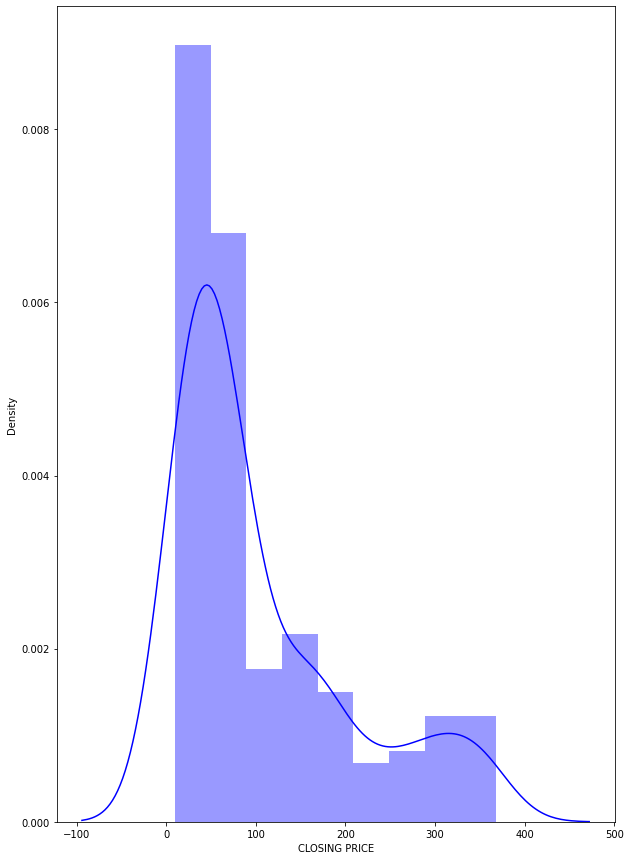

In [196]:
# Chart - 1 visualization code
from google.colab import files

plt.figure(figsize=(10,15))
sns.distplot((df['Close']),color='b')
plt.xlabel('CLOSING PRICE')
plt.savefig("distribution.png")
files.download("distribution.png")
plt.show()

##### 1. Why did you pick the specific chart?

it shows,how data distributed

##### 2. What is/are the insight(s) found from the chart?

data is look like normal distribution

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [197]:
# Chart - 2 visualization code
numeric=df.describe().columns
numeric

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

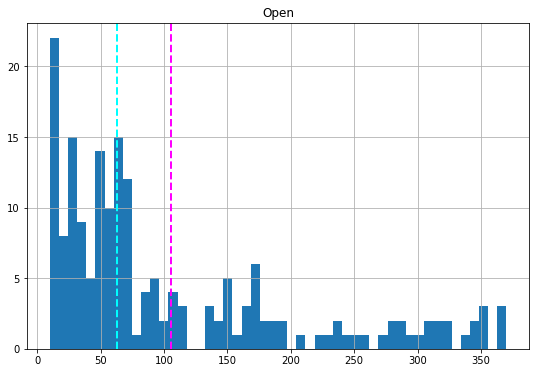

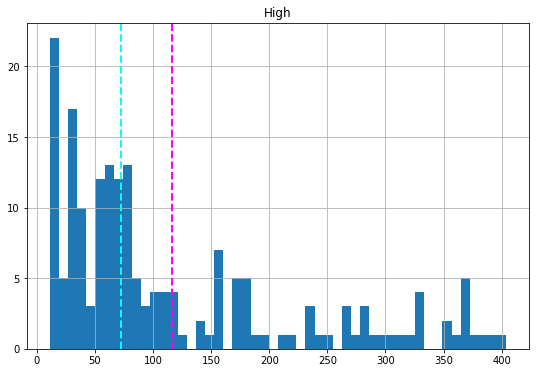

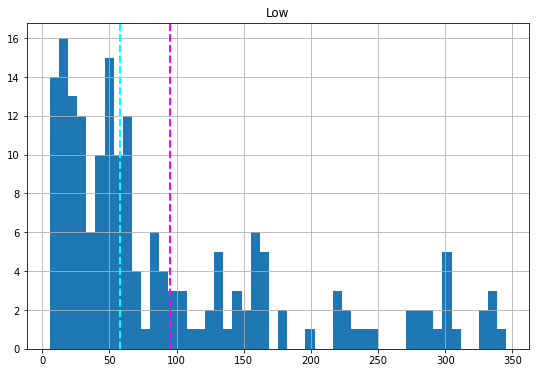

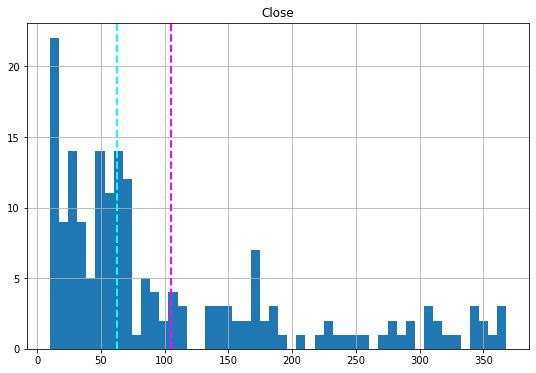

In [198]:
for col in numeric:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
    plt.savefig(col+".png")
    files.download(col+".png")

plt.show()

##### 1. Why did you pick the specific chart?

to know it is positively skewed or negatively skewed.from the chart,we know that it positively skewed

##### 2. What is/are the insight(s) found from the chart?

from the chart,we know that it positively skewed

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

we can make it like uniform distribution by doing some calculations.it will help to make data more clear

#### Chart - 3

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

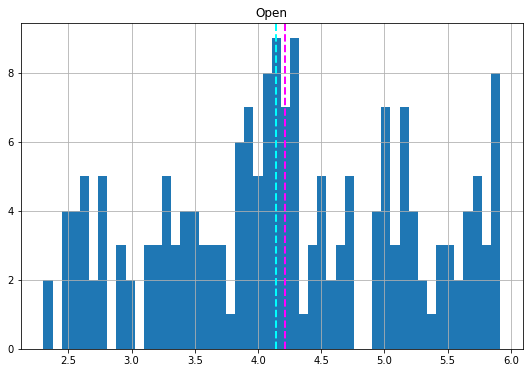

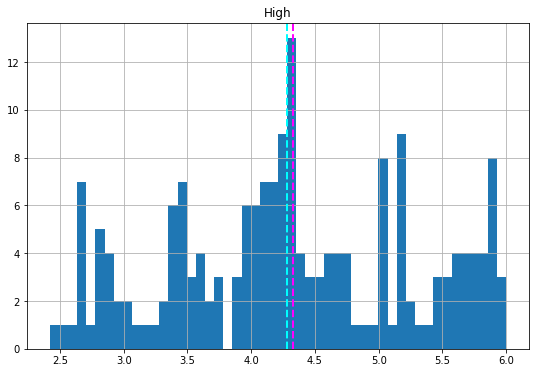

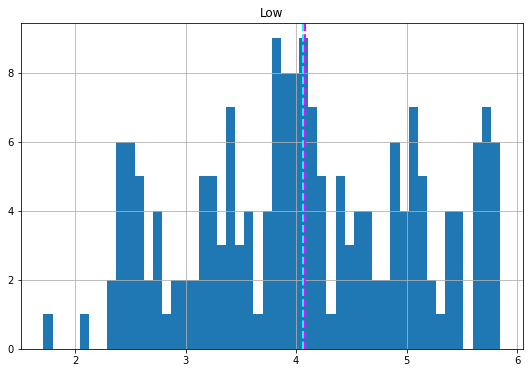

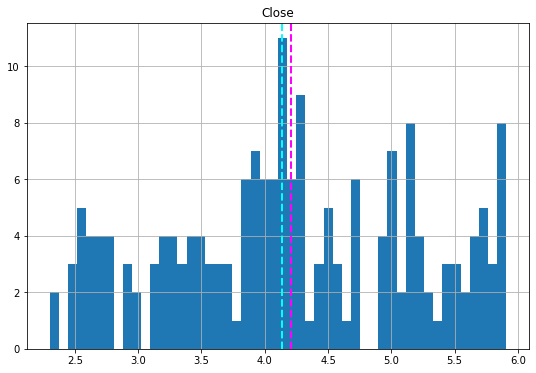

In [199]:
# Chart - 3 visualization code
#for right skewed data
for col in numeric:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log(df[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
    plt.savefig(col+"1.png")
    files.download(col+"1.png")

    
plt.show()

##### 1. Why did you pick the specific chart?
it will show how they are related

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

this shows that they are more normally distributed

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

this will help to understsand the data clearly

#### Chart - 4

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

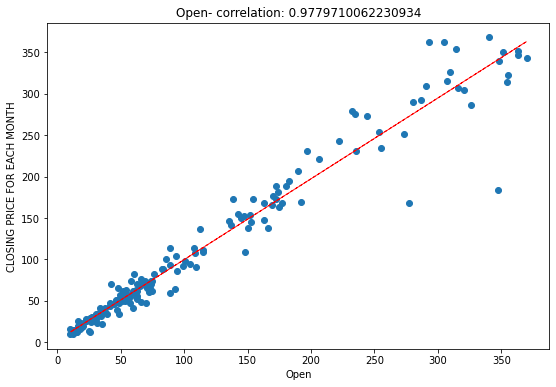

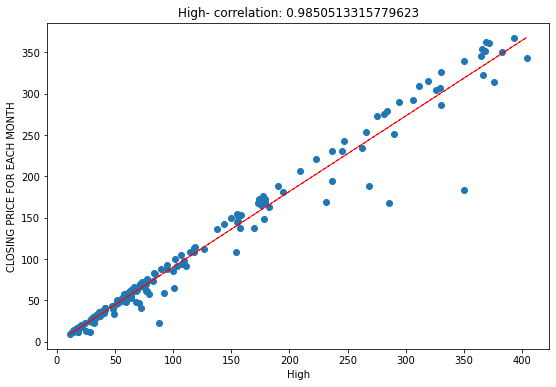

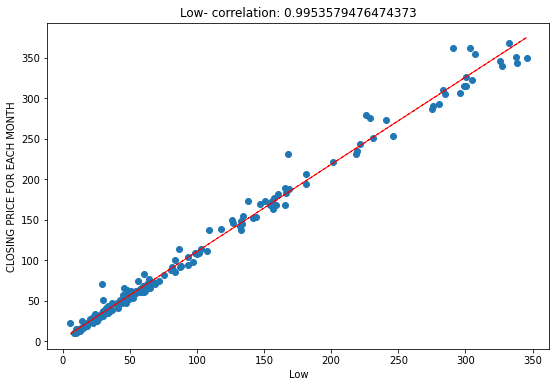

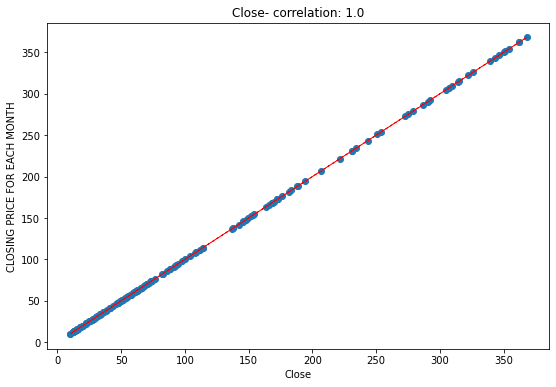

In [200]:
# Chart - 4 visualization code
for col in numeric:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df[col]
   label = df['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('CLOSING PRICE FOR EACH MONTH')
   ax.set_title( col + '- correlation: ' + str(correlation))
   z = np.polyfit(df[col], df['Close'], 1)
   y_hat = np.poly1d(z)(df[col])
 
   plt.plot(df[col], y_hat, "r--", lw=1)
   plt.savefig(col+"2.png")
   files.download(col+"2.png")

 
plt.show()

##### 1. Why did you pick the specific chart?

this chart shows that how they correlated for each variable.

##### 2. What is/are the insight(s) found from the chart?

it is much correlated and it shows the outliers in each variable.very few data is considered as outliers

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

this will help to remove outliers and wiil help to make data more precise

***LET'S REMOVE THE OUTLIERS***

In [201]:
#when analysisng data,we considered outliers as both have opening price more than 150 and closing price less than 200.Removing them will improve efficiency 
i=df[(df['Open']>150) & (df['Close']<200)].index
df=df.drop(i)

OPENING PRICE MORE THAN 150 AND CLOSING PRICE LESS THAN 200 REMOVED FROM THE DATA FRAME
NOW,CHECK THE CORRELATION

#### Chart - 5

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

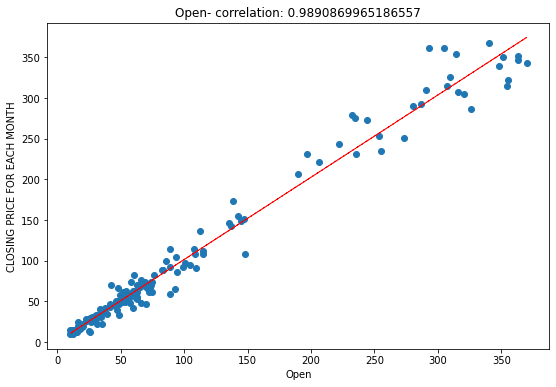

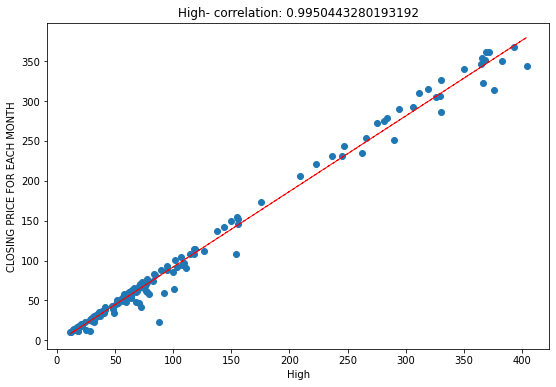

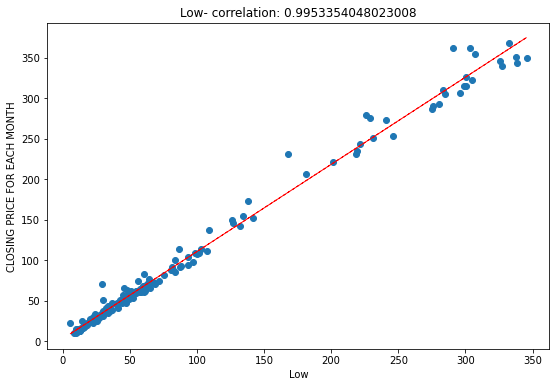

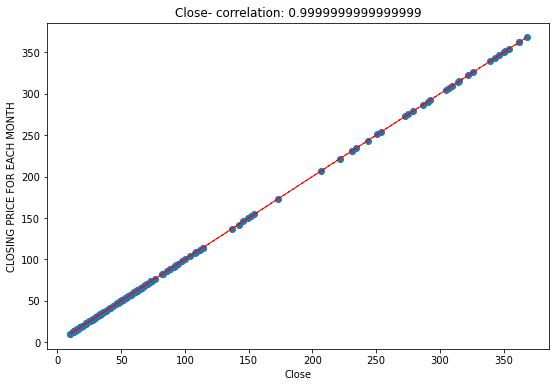

In [202]:
# Chart - 5 visualization code
for col in numeric:
   fig = plt.figure(figsize=(9, 6))
   ax = fig.gca()
   feature = df[col]
   label = df['Close']
   correlation = feature.corr(label)
   plt.scatter(x=feature, y=label)
   plt.xlabel(col)
   plt.ylabel('CLOSING PRICE FOR EACH MONTH')
   ax.set_title( col + '- correlation: ' + str(correlation))
   z = np.polyfit(df[col], df['Close'], 1)
   y_hat = np.poly1d(z)(df[col])
 
   plt.plot(df[col], y_hat, "r--", lw=1)
   plt.savefig(col+"3.png")
   files.download(col+"3.png")

 
plt.show()

##### 1. Why did you pick the specific chart?

to know the data points after the outlier removal,and check how they are correlated

##### 2. What is/are the insight(s) found from the chart?

After removing outlier we are getting our scatter plot in a quiet well manner now we can find out the relation between them.. Here we cay say that.. 1)open price,high,low are linearly correlated.These are directly propotional to the closing price

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

this will help to build a good model to predict the closing price of the stock

#### Chart - 6

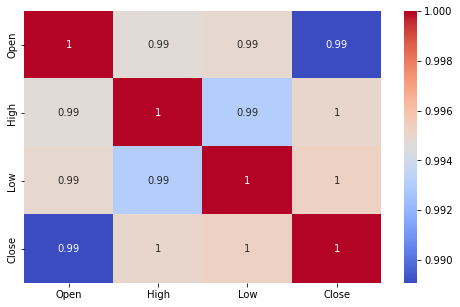

In [203]:
# Chart - 6 visualization code
plt.figure(figsize=(8,5))
correlation = df.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

##### 1. Why did you pick the specific chart?

THE HEAT MAP SHOWS ,HOW EACH VARIABLE CORRELATED WITH EACH OTHER

**MULTICOLLINEARITY CHECKING**

In [204]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):
 
   # Calculating VIF
   vif = pd.DataFrame()
   vif["variables"] = X.columns
   vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
 
   return(vif)

In [205]:
calc_vif(df[[i for i in df.describe().columns if i not in ['Close']]])

,variables,VIF
0,Open,283.821886
1,High,197.859776
2,Low,195.198408


multi collinearity check shows that the open,high,low have high variation inflation factor.so we use only opening price for predicting the model

#### Chart - 7

**ANALYSIS OF PREVIOUS CLOSING PRICE WITH OPENING PRICE**

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<function matplotlib.pyplot.show(*args, **kw)>

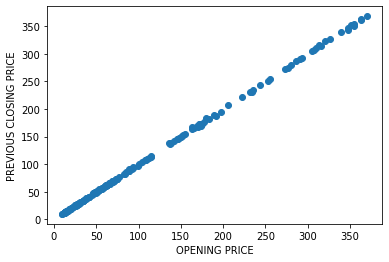

In [206]:
# Chart - 7 visualization code
plt.scatter(df13[8], df13[4])
plt.xlabel('OPENING PRICE')
plt.ylabel('PREVIOUS CLOSING PRICE')
plt.savefig("OPENING VS PREVIOUS CLOSING.png")
files.download("OPENING VS PREVIOUS CLOSING.png")
plt.show


##### 1. Why did you pick the specific chart?

TO FIND THE RELATION BETWEEN THE PREVIOUS CLOSING PRICE WITH OPENING PRICE

##### 2. What is/are the insight(s) found from the chart?

PLOT SHOWS THAT THE RELATIONSHIP BETWEEN THEM IS LINEAR.IT IS HIGHLY CORRELATED

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

IT WILL HELP TO PREDICT THE OPENING PRICE OF THE STOCK

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [207]:
# Handling Missing Values & Missing Value Imputation
'''no null values are present in the dataset'''

'no null values are present in the dataset'

### 3. Categorical Encoding

In [208]:
# Encode your categorical columns
df1= pd.get_dummies(df, columns=["month"], prefix=["Month"])
df1.head()

,Open,High,Low,Close,year,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,Month_Jun,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sep
0,13.00,14.00,11.25,12.46,05,0,0,0,0,0,1,0,0,0,0,0,0
1,12.58,14.88,12.55,13.42,05,0,1,0,0,0,0,0,0,0,0,0,0
2,13.48,14.87,12.27,13.30,05,0,0,0,0,0,0,0,0,0,0,0,1
3,13.20,14.47,12.40,12.99,05,0,0,0,0,0,0,0,0,0,0,1,0
4,13.35,13.88,12.88,13.41,05,0,0,0,0,0,0,0,0,0,1,0,0


#### What all categorical encoding techniques have you used & why did you use those techniques?

hot encoding is used for categorical encoding

## ***7. ML Model Implementation***

### ML Model - 1

**IMPLEMENTING LINEAR REGRESSION**

In [209]:
#from the multicollinearity check,we use only opening price for predicting model
X=df1.drop(['Close','High','Low'],axis=1)
y=df1['Close']

In [210]:
# ML Model - 1 Implementation
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

# Fit the Algorithm
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
# Predict on the model
reg.score(X_train, y_train)

(132, 14)
(34, 14)


0.9837571153900141

In [211]:
reg.coef_

array([ 1.03047426, -0.34400977,  2.84232435, -6.11367594, -1.20193376,
        1.60053083,  3.09335332,  7.77795044, -4.6422195 ,  2.17063332,
       -5.31062095, -4.02967843,  3.53277113,  0.28056521])

In [212]:
y_pred = reg.predict(X_test)

In [213]:
from sklearn.metrics import mean_squared_error

from sklearn.metrics import mean_absolute_error

MSE  = mean_squared_error((y_test),(y_pred))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_pred))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 428.8559325907208
MAE : 13.507651019042571
RMSE : 20.708837065144937


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

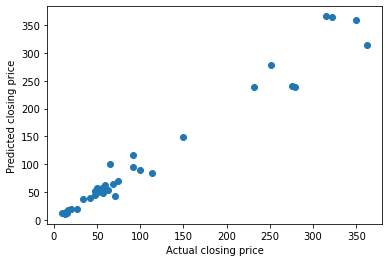

In [214]:
plt.scatter((y_test), (y_pred))
plt.xlabel('Actual closing price')
plt.ylabel('Predicted closing price')
plt.savefig("LINEAR-predicted vs actual.png")
files.download("LINEAR-predicted vs actual.png")
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [215]:
# Visualizing evaluation Metric Score chart

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

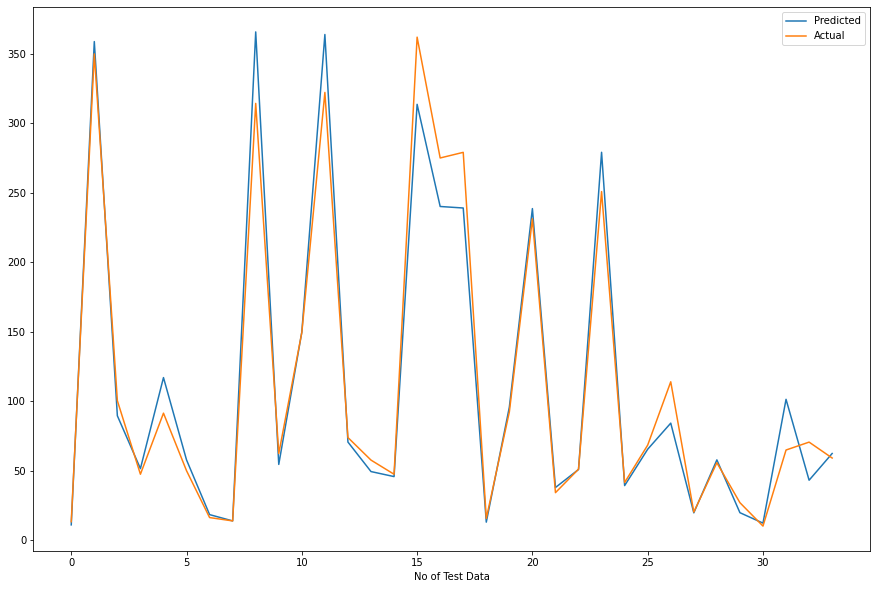

In [216]:
plt.figure(figsize=(15,10))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.savefig("predicted vs actual.png")
files.download("predicted vs actual.png")

plt.show()

# **RESIDUALS**

Text(0.5, 0.98, 'Residual Analysis')

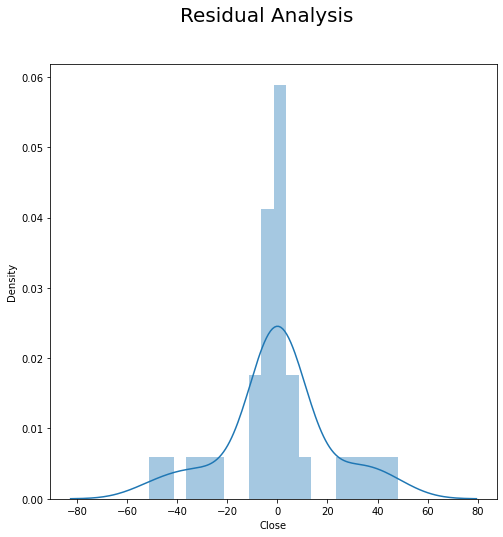

In [217]:
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)- (y_pred)),bins=20)

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Lets' try to find Hetroscadacity..



Text(0, 0.5, 'residuals')

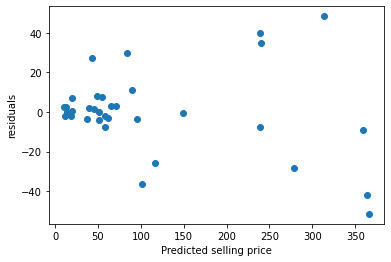

In [218]:
plt.scatter((y_pred),(y_test)-(y_pred))
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

### ML Model - 2

**IMPLEMENTING LASSO REGRESSION**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [219]:
# Visualizing evaluation Metric Score chart
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.01 , max_iter= 3000)
lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)


0.9837556059677363

In [220]:
y_pred_l = lasso.predict(X_test)
MSE  = mean_squared_error((y_test),(y_pred_l))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_pred_l))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 428.81960387289513
MAE : 13.492273201722767
RMSE : 20.707959915764157
R2 : 0.9639579742287764
Adjusted R2 :  0.937400692081559


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

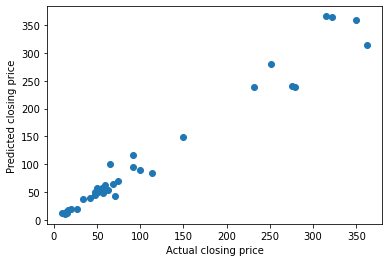

In [221]:
plt.scatter((y_test), (y_pred_l))
plt.xlabel('Actual closing price')
plt.ylabel('Predicted closing price')
plt.savefig("LASSO-predicted vs actual.png")
files.download("LASSO-predicted vs actual.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

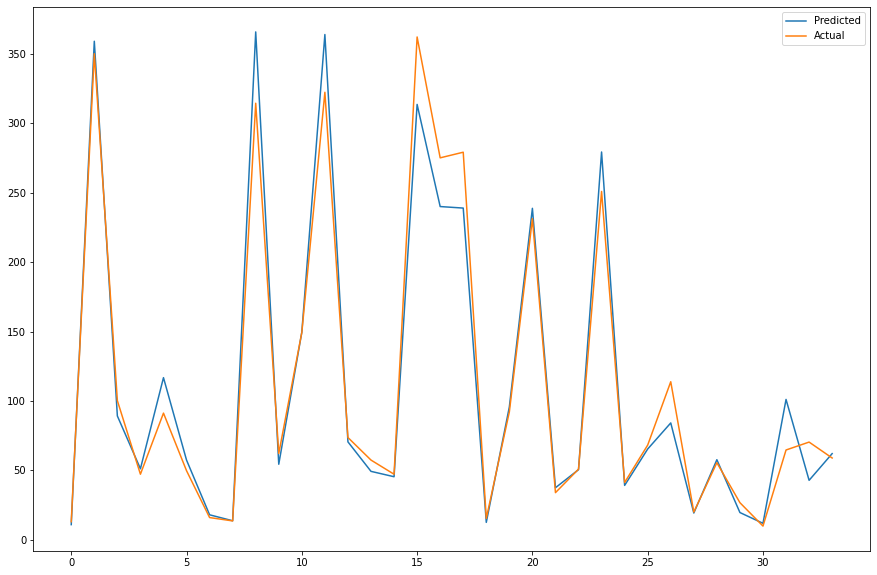

In [222]:
plt.figure(figsize=(15,10))
plt.plot((y_pred_l))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.savefig("predicted vs actual.png")
files.download("predicted vs actual.png")
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

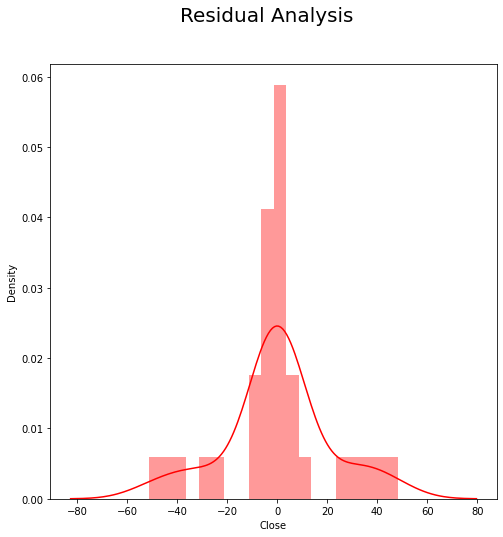

In [223]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)- (y_pred_l)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

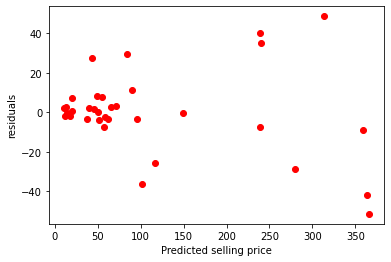

In [224]:
### Heteroscadacity
plt.scatter((y_pred_l),(y_test)-(y_pred_l),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

#### 2. Cross- Validation & Hyperparameter Tuning

In [225]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
from sklearn.model_selection import GridSearchCV

# Fit the Algorithm
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=4)
lasso_regressor.fit(X_train, y_train)

# Predict on the model

GridSearchCV(cv=4, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [226]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 50}

Using  {'alpha': 50}  the negative mean squared error is:  -180.80286284902036


In [227]:
y_pred_lasso = lasso_regressor.predict(X_test)

In [228]:
MSE  = mean_squared_error((y_test), (y_pred_lasso))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_pred_lasso))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 395.09273849255334
MAE : 12.882779511957224
RMSE : 19.876939867407994
R2 : 0.9667926966627376
Adjusted R2 :  0.9423241573615969


##### Which hyperparameter optimization technique have you used and why?

gridsearchcv is used for hyper parameter optimization

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

it is not a big difference from lasso regression

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

**RIDEGE REGRESSION**

In [229]:
# ML Model - 3 Implementation
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)


# Fit the Algorithm
ridge.fit(X_train,y_train)

# Predict on the 
ridge.score(X_train, y_train)

0.9837569818022244

In [230]:
y_pred_r = ridge.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [231]:
# Visualizing evaluation Metric Score chart
MSE  = mean_squared_error((y_test), (y_pred_r))
print("MSE :" , MSE)

MAE=mean_absolute_error((y_test), (y_pred_r))
print("MAE :" ,MAE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 428.59454673746717
MAE : 13.499942931580833
RMSE : 20.7025251294973
R2 : 0.9639768901435383
Adjusted R2 :  0.937433546038777


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

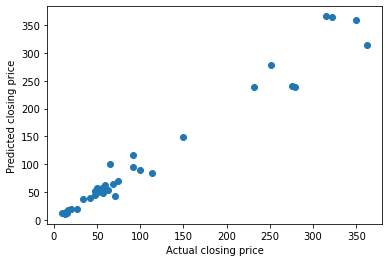

In [232]:
plt.scatter((y_test),(y_pred_r))
plt.xlabel('Actual closing price')
plt.ylabel('Predicted closing price')
plt.savefig("RIDGE-predicted vs actual.png")
files.download("RIDGE-predicted vs actual.png")
plt.show()

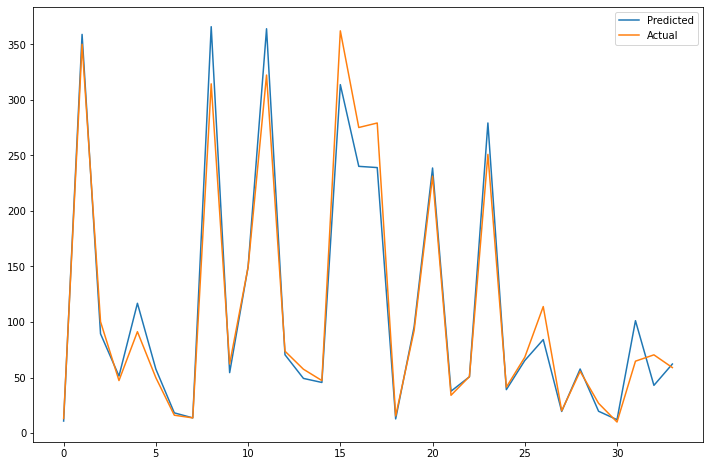

In [233]:
plt.figure(figsize=(12,8))
plt.plot((y_pred_r))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

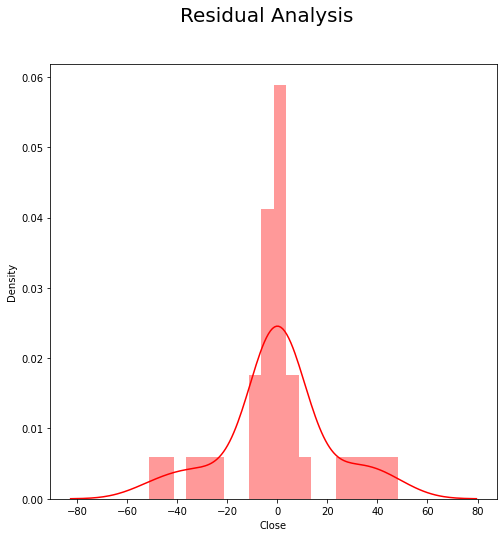

In [234]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)- (y_pred_r)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

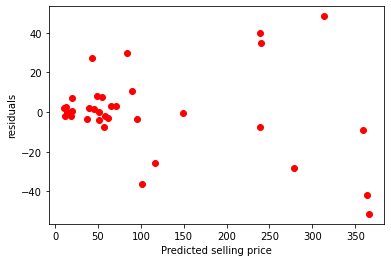

In [235]:
### Heteroscadacity
plt.scatter((y_pred_r),(y_test)-(y_pred_r),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

#### 2. Cross- Validation & Hyperparameter Tuning

Running Grid Search Cross Validation for Ridge Regression


In [236]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)


# Fit the Algorithm
ridge_regressor.fit(X_train,y_train)
# Predict on the model

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [237]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 10}

Using  {'alpha': 10}  the negative mean squared error is:  -209.9540475216669


In [238]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [239]:
MSE  = mean_squared_error((y_test), (y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 416.5245021396021
RMSE : 20.408931920597954
R2 : 0.964991370019288
Adjusted R2 :  0.9391955374019213


Text(0, 0.5, 'Predicted selling price')

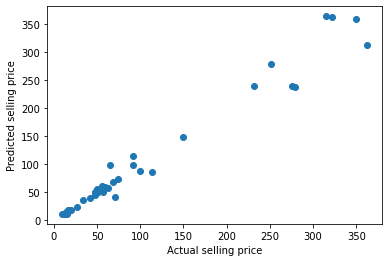

In [240]:
plt.scatter((y_test), (y_pred_ridge))
plt.xlabel('Actual selling price')
plt.ylabel('Predicted selling price')

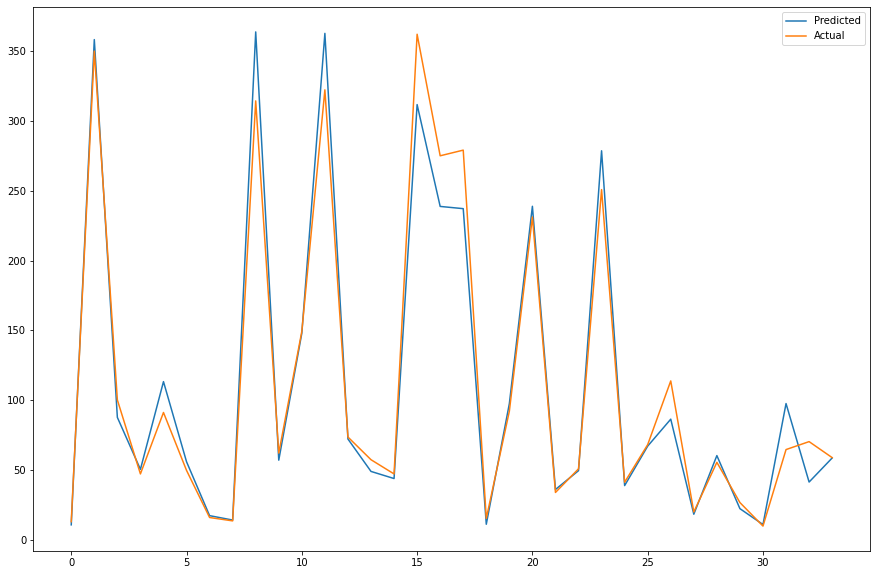

In [241]:
plt.figure(figsize=(15,10))
plt.plot((y_pred_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

Text(0.5, 0.98, 'Residual Analysis')

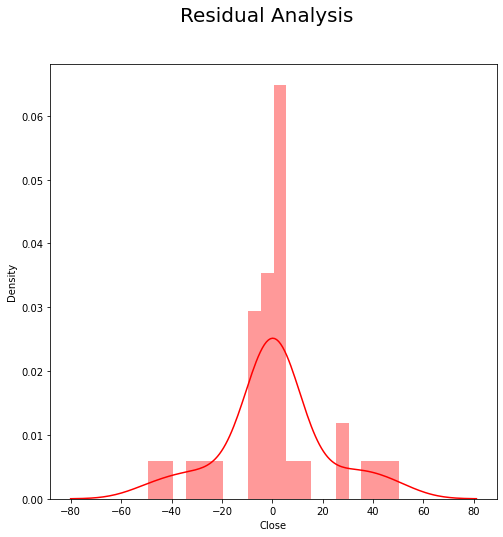

In [242]:
#Resuldual Analysis
fig=plt.figure(figsize=(8,8))
  
sns.distplot(((y_test)- (y_pred_ridge)),bins=20,color='r')

#Plot Label
fig.suptitle('Residual Analysis', fontsize = 20)   

Text(0, 0.5, 'residuals')

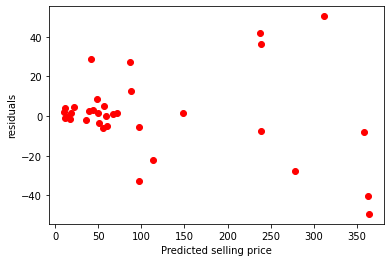

In [243]:
### Heteroscadacity
plt.scatter((y_pred_ridge),(y_test)-(y_pred_ridge),c='r')
plt.xlabel('Predicted selling price')
plt.ylabel('residuals')

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

MEAN SQUARED ERROR CONSIDER FOR POSITIVE BUSINESS IMPACT.IT EASIER TO FIND AND GOOD FOR PRACTICAL APPLICATIONS



### 2. Which ML model did you choose from the above created models as your final prediction model and why?

IN THIS ,LASSO REGRESSION IS USED FOR CREATE MODELS,WHICH HAVE LOWER NEGATIVE MEAN SQUARED ERROR.BUT OTHER REGRESSION MODELS ARE ALSO GOOD FOR PREDICTING MODELS.EVERYTHING HAVE APPROXIMATELY SAME SCORE VALUES AND ERRORS.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

# **Conclusion**

1)OPENING PRICE,CLOSING PRICE,HIGH PRICE HAVE HIGH CORRELATION WITH CLOSING PRICE
2)PREVIOUS CLOSING PRICE HAVE VERY HIGH CORRELATION WITH OPENING PRICE
3)NORMALLY YES BANK STOCK PRICE IS UNDER RS.150
4)LASSO REGRESSION IS BEST REGRESSION MODEL FOR PREDICTING THE CLOSING PRICE

### *****THANKS )-*****